In [3]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt

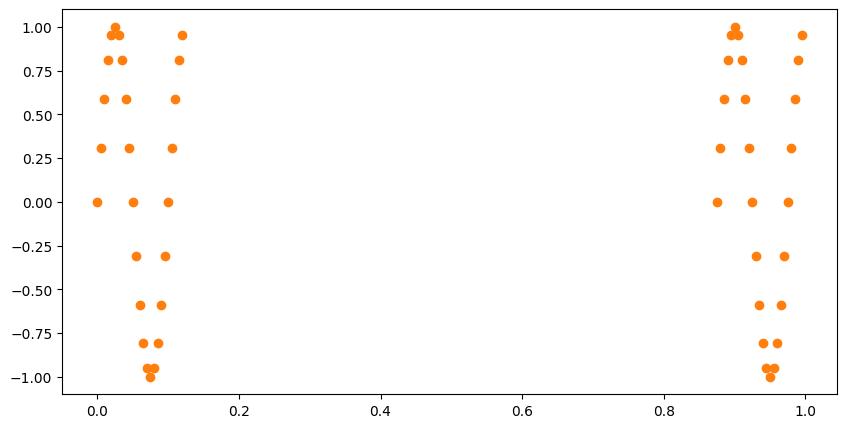

In [14]:
h = 0.005
def f(t):
    return np.where(
        t < 0.5,
        np.sin(2*np.pi*10*t),
        np.cos(2*np.pi*10*t)
    )

t_grid = np.arange(0, 1, h)
x_true_grid = f(t_grid)

idx_samples = list(range(0, 25, 1)) + list(range(175, 200, 1))

t_samples = t_grid[idx_samples]
x_samples = x_true_grid[idx_samples]

In [25]:
kernel = sklearn.gaussian_process.kernels.RBF(length_scale=2*h)
gpr = sklearn.gaussian_process.GaussianProcessRegressor(kernel=kernel)
gpr.fit(t_samples.reshape((-1, 1)), x_samples)
x_process = gpr.predict(t_grid.reshape((-1, 1)))

In [31]:
# Numerically compute derivatives
h_gp=1e-5
xdot_process = (gpr.predict(t_samples.reshape((-1, 1)) + h_gp) - gpr.predict(t_samples.reshape((-1, 1)) - h_gp))/(2*h_gp)
x_ddot_process = (gpr.predict(t_samples.reshape((-1, 1)) - h_gp) -2*gpr.predict(t_samples.reshape((-1, 1))) + gpr.predict(t_samples.reshape((-1, 1)) + h_gp))/(h_gp**2)

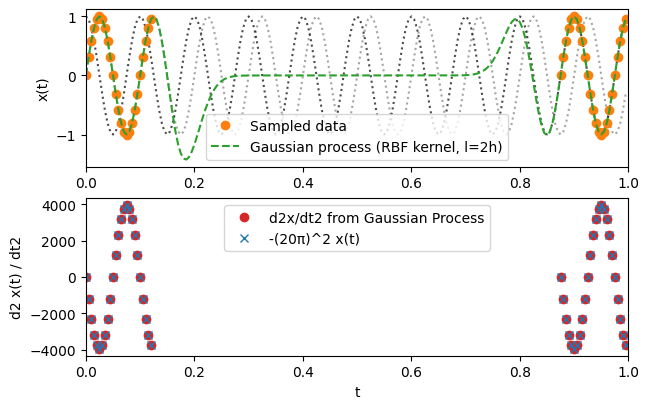

In [89]:
fig, axs = plt.subplots(figsize=(7, 4.5), nrows=2)

ax = axs[0]
ax.plot(t_grid, np.sin(2*np.pi*10*t_grid), alpha=0.7,
        ls='dotted', marker='none', color='tab:gray')
ax.plot(t_grid, np.cos(2*np.pi*10*t_grid), alpha=0.7,
        ls='dotted', marker='none', color='black')
ax.plot(t_samples, x_samples, ls='none', marker='o', color='tab:orange', label='Sampled data')
ax.plot(t_grid, x_process, ls='--', marker='none', color='tab:green', label='Gaussian process (RBF kernel, l=2h)')
ax.set_xlim(0.0, 1.0)
#ax.set_xlabel('t')
ax.set_ylabel('x(t)')
ax.legend()

ax=axs[1]
ax.plot(t_samples, x_ddot_process, ls='none', marker='o', color='tab:red', label='d2x/dt2 from Gaussian Process')
ax.plot(t_samples, -(2*np.pi*10)**2*x_samples, ls='none', marker='x', color='tab:blue', label='-(20π)^2 x(t)')
ax.set_xlim(0.0, 1.0)
ax.set_xlabel('t')
ax.set_ylabel('d2 x(t) / dt2')
ax.legend()
plt.show()

fig.savefig('gp_fitting.png')

In [86]:
x_ddot_process - -(2*np.pi*10)**2*x_samples

array([-3.78349796e+00,  9.95212718e-02,  1.80282005e-01,  1.25860338e-01,
        4.46037055e-02, -1.29220808e-01,  1.17363282e-01,  1.62240126e-01,
       -1.61693496e-03, -9.61809238e-03, -5.45696821e-02,  6.41877745e-02,
        5.61866171e-02,  5.60386025e-02,  9.96597656e-03, -7.08680261e-02,
        9.96597656e-03,  1.28798179e-01, -3.47628531e-02, -6.31414838e-02,
       -5.45696821e-02, -2.78079864e-02,  1.62092111e-01,  5.31007617e-02,
       -2.10180379e+00, -3.79039022e+00, -1.04688710e-01,  4.61941146e-01,
        1.50018791e-01,  9.49101312e-02,  8.10998415e-02,  2.33323856e-01,
        1.28134075e-01, -3.23123812e-02, -2.78079864e-02, -1.36424205e-01,
       -8.57180166e-03, -4.15840634e-02,  1.51113409e-02, -1.03720861e-01,
        4.28188116e-02, -1.21910755e-01,  5.60386025e-02,  3.79967230e-02,
        5.23145340e-04, -1.45519152e-01, -3.69029334e-02,  2.25756740e-01,
       -1.46892038e-03, -2.11089874e+00])